# Pattern Recogniztion Project

## Background and Introduction

This project refers to an exercise listed in the classic textbook _The Elements of Statistical Learning_ by T. Hastie, R. Tibshirani, and J. Friedman. The data set concerns handwritten number recognition. The pictures were scanned and transformed into 256 numbers representing the information of grey level. More details about the data can be found on the website of the book.

<https://web.stanford.edu/~hastie/ElemStatLearn/>

Our goal here is to treat it as a starting multiclass classification problem and practice the application of K-Nearest Neighbors approach and Logistic classification.

## Importing and Processing Data

In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
data = open("zip.train.txt","r+")
f = list(csv.reader(data))
data.close()
te_data = open("zip.test","r+")
te_f = list(csv.reader(te_data))
te_data.close()

As the data is loaded into the notebook, it is found that the each line is stored as a long string. In the following I define a function _NumerTransform_ to render both training and test data sets into the pd.DataFrame format.

In [15]:
def NumerTransform(strData):
    NumerData = list()
    for row in strData:
        tmp = list(map(float,row[0].split()))
        tmp[0] = int(tmp[0])
        NumerData.append(tmp)
    return pd.DataFrame(NumerData)

In [19]:
TrainSet = NumerTransform(f)
TestSet = NumerTransform(te_f)

In [23]:
TrainY = TrainSet.iloc[:,0]
TrainX = TrainSet.iloc[:,1:]
TestY = TestSet.iloc[:,0]
TestX = TestSet.iloc[:,1:]

## Machine Learning Implementation

From here we are ready to do some learning. 

### KNN method
First we apply K-Nearest-Neighbor method. The complexity is controlled by the number of neighnors

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
candidateNeighbors = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
inSampleScore = []
outSampleScore = []
for neighbors in candidateNeighbors:
    KN = KNeighborsClassifier(n_neighbors = neighbors)
    KN.fit(TrainX,TrainY)
    inSampleScore.append(KN.score(TrainX,TrainY))
    outSampleScore.append(KN.score(TestX,TestY))

After training, we plot the in-sample score and out-sample score as functions of number of neighbors. We see _n = 1_ has the highest in-sample score, ..., almost by construction, yet it does not guarantee the optimal out-sample score.

Text(0.5, 0, 'n of neighbors')

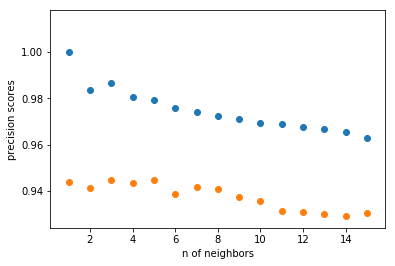

In [36]:
plt.scatter(candidateNeighbors,inSampleScore)
plt.scatter(candidateNeighbors,outSampleScore)
plt.ylabel("precision scores")
plt.xlabel("n of neighbors")

### Logistic Classifier
In the second part we tackle the same problem using the logistic classifier. Here the model complexity is controlled by the number of maximal iteration during the gradient descent process. 

In [28]:
from sklearn.linear_model import LogisticRegression

In [31]:
iterations = [10,30,50,70,100]
LogInSampleScore = []
LogOutSampleScore = []
for itr in iterations:
    lr = LogisticRegression(max_iter=itr)
    lr.fit(TrainX,TrainY)
    LogInSampleScore.append(lr.score(TrainX,TrainY))
    LogOutSampleScore.append(lr.score(TestX,TestY))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Li

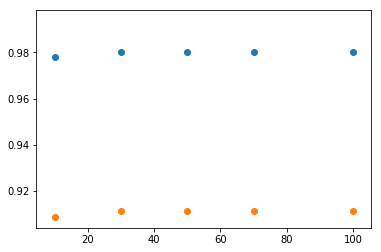

In [32]:
plt.scatter(iterations ,LogInSampleScore)
plt.scatter(iterations ,LogOutSampleScore)